# Artificial Intelligence - Final Exam

**Student Name**  :Devin Augustin   
**Student ID**    :2440094352   

2. As a Data Scientist, you are supposed to build a multivariate linear regression (MLR) model that might be used to predict the insurance charges (dependent variable) based on some independent variables namely age, sex, bmi, smoker/non-smoker, etc as they are shown in the insurance_charges.csv dataset. Find the intercept b and the coefficient Wi using Gradient Descent in python notebook. Compute coefficient of determination R 2 and show side by side to see how close your MLR model prediction with the actual one (ground truth). Pls check AIMA 3 rd Edition pp. 718-721.

In [1]:
# Importing library and dataset
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("insurance_charges.csv")
df

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


#### Preprocess The Data

In [2]:
#Set the x and y value
x = df.values[:, 0:2]
y = df.values[:, 2]

print(x.shape)
print(y.shape)

(1338, 2)
(1338,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

## Gradient Descent Method

In [4]:
#Add a column of one to x variable
x = np.hstack((np.ones((len(y),1)), x))

In [5]:
def costFunction(x, y, theta):
    m = len(y)
    j = np.sum((x.dot(theta)-y)**2)/(2*m)
    return j

def gradient_descent(x, y, theta, alpha, iterations):
    cost_history = [0] * iterations
    m = len(y)
    
    for i in range(iterations):
        pred = x.dot(theta)
        error = pred - y
        gradient = np.dot(x.T,error) / m
        theta = theta - (alpha * gradient)
        
        cost = costFunction(x, y, theta)
        cost_history[i] = cost
        
    return theta, cost_history

Now we'll do 500 iterations with alpha/learning rate of 0.05.

In [6]:
theta = np.zeros(x.shape[1])
alpha = 0.05
iterations = 500

coeff, cost_history = gradient_descent(x, y, theta, alpha, iterations)

print('Result =\n', coeff)

Result =
 [30.65747687  0.679708   -0.29586077]


The result from the Gradient Descent Method above shows us the best theta (the regression coeffiencient) which are:
*   Intercept: 30.65747687
*   w1: 0.679708
*   w2: -0.29586077

Giving us the regression equation of:
##### y = 30.657 + 0.68x1 - 0.3x2

## Visualize The Linear Multiple Regression

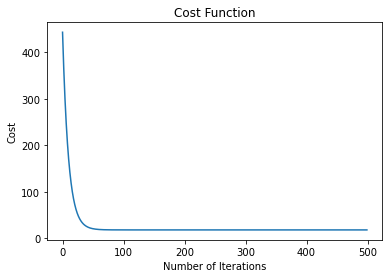

In [7]:
plt.title('Cost Function')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.plot(cost_history)
plt.show()

## Visualize The Cost of Gradient Descent

<AxesSubplot:>

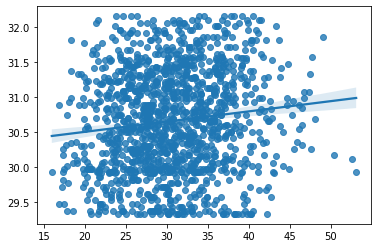

In [8]:
yHat = coeff*x
yHat = np.sum(yHat, axis = 1)
sns.regplot(x = y, y = yHat)

From the plot above, we can conclude that the model has become convergent is less than 100 iterations.

## R^2 (R-squared)

Let's use the LinearRegression() function to fit a regression model and the score() function to calculate the R-squared value from the model.

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x = df[["age", "sex", "bmi", "children", "smoker"]]
y = df.charges

lr.fit(x,y)
r_squared = lr.score(x,y)

print(r_squared)

0.7453426137897139


Here we can see that the R-squared of the model is 0.745. Meaning that 74.5% of the variation in the insurance charges can be explained by all independent variables.

### Conclusion

1. The result from the Gradient Descent Method above shows us the best theta (the regression coeffiencient) which are:
*   Intercept: 30.65747687
*   w1: 0.679708
*   w2: -0.29586077

Giving us the regression equation of:
y = 30.657 + 0.68x1 - 0.3x2

2. The R-squared is 0.745. Meaning that 74.5% of the variation in the insurance charges can be explained by all independent variables.

3. From the graph above, we can conclude that the predicted model is a good model since the predicted value is close to the original one.